In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [16]:
import IPython.display as ipd
import warnings
#warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import time
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import csv
from wordcloud import WordCloud

import re
import os
import gc

from sqlalchemy import create_engine # database connection
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

# preprocessing imports
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# metrics and plots imports
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.tree import plot_tree

# unsupervised and matrix/feature decomposition
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

# ml models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm



# from skmultilearn.adapt import mlknn
# from skmultilearn.problem_transform import ClassifierChain
# from skmultilearn.problem_transform import BinaryRelevance
# from skmultilearn.problem_transform import LabelPowerset

In [17]:
def boom1():
    beep = np.sin(2*np.pi*400*np.arange(10000*2)/10000)
    return ipd.Audio(beep, rate=10000, autoplay=True)

In [18]:
def boom2():
    audio_path="https://www.mfiles.co.uk/mp3-downloads/cherry-ripe.mp3"
    return ipd.Audio(audio_path, autoplay=True)

In [19]:
def s():
    print("="*50)

def ts():
    t_start = time.time()
    print("Time started...")
    s()
    s()
    return t_start

t_total = 0
def te(t1):
    t_end = time.time()
    t_time = t_end - t1
    s()
    s()
    global t_total
    t_total = t_total + t_time
    print("Time taken:",round(t_time, 4),"seconds.")
    s()
    print("Total Time:",round(t_total, 2),"seconds.")

In [20]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/facebook-recruiting-iii-keyword-extraction/Train.zip
/kaggle/input/facebook-recruiting-iii-keyword-extraction/SampleSubmission.csv
/kaggle/input/facebook-recruiting-iii-keyword-extraction/Test.zip


In [7]:
df = pd.read_csv("/kaggle/input/facebook-recruiting-iii-keyword-extraction/Train.zip")
df.head()

Id                                              Title  \
0   1  How to check if an uploaded file is an image w...   
1   2  How can I prevent firefox from closing when I ...   
2   3           R Error Invalid type (list) for variable   
3   4      How do I replace special characters in a URL?   
4   5               How to modify whois contact details?   

                                                Body  \
0  <p>I'd like to check if an uploaded file is an...   
1  <p>In my favorite editor (vim), I regularly us...   
2  <p>I am import matlab file and construct a dat...   
3  <p>This is probably very simple, but I simply ...   
4  <pre><code>function modify(.......)\n{\n  $mco...   

                                                Tags  
0  php image-processing file-upload upload mime-t...  
1                                            firefox  
2                          r matlab machine-learning  
3                                    c# url encoding  
4                          php api file-get-contents

In [8]:
df.shape

(6034195, 4)

In [9]:
col_names = df.columns
col_names

Index(['Id', 'Title', 'Body', 'Tags'], dtype='object')

In [10]:
df = df.drop_duplicates(['Title', 'Body', 'Tags'])

In [11]:
sum(df.duplicated(subset = ['Title', 'Body', 'Tags']))

0

In [12]:
print('percentage of duplicate data : ', (1827881/df.shape[0])*100, '%')

percentage of duplicate data :  43.45564786651686 %


In [13]:
df = df.drop_duplicates(['Title', 'Body', 'Tags'])
df.head()

Id                                              Title  \
0   1  How to check if an uploaded file is an image w...   
1   2  How can I prevent firefox from closing when I ...   
2   3           R Error Invalid type (list) for variable   
3   4      How do I replace special characters in a URL?   
4   5               How to modify whois contact details?   

                                                Body  \
0  <p>I'd like to check if an uploaded file is an...   
1  <p>In my favorite editor (vim), I regularly us...   
2  <p>I am import matlab file and construct a dat...   
3  <p>This is probably very simple, but I simply ...   
4  <pre><code>function modify(.......)\n{\n  $mco...   

                                                Tags  
0  php image-processing file-upload upload mime-t...  
1                                            firefox  
2                          r matlab machine-learning  
3                                    c# url encoding  
4                          php api file-get-contents

In [14]:
df.shape

(4206314, 4)

In [15]:
df[df.isnull().values]

Id                                              Title  \
895318    895319                            Do we really need NULL?   
1030863  1030864  Page cannot be null. Please ensure that this o...   
1467813  1467814                           How do Germans call null   
1927902  1927903       What is the difference between NULL and "0"?   
2614271  2614272         a bit of difference between null and space   
3196708  3196709                                 Handle NullObjects   
4144270  4144271  Find all values that are not null and not in a...   

                                                      Body Tags  
895318   <blockquote>\n  <p><strong>Possible Duplicate:...  NaN  
1030863  <p>I get this error when i remove dynamically ...  NaN  
1467813  <p>In german null means 0, so how do they call...  NaN  
1927902  <p>What is the difference from NULL and "0"?</...  NaN  
2614271  <p>I was just reading this quote</p>\n\n<block...  NaN  
3196708  <p>I have done quite a bit of research on best...  NaN  
4144270  <p>I am running into a problem which results i...  NaN

In [16]:
df.dropna(inplace=True)
df.head()

Id                                              Title  \
0   1  How to check if an uploaded file is an image w...   
1   2  How can I prevent firefox from closing when I ...   
2   3           R Error Invalid type (list) for variable   
3   4      How do I replace special characters in a URL?   
4   5               How to modify whois contact details?   

                                                Body  \
0  <p>I'd like to check if an uploaded file is an...   
1  <p>In my favorite editor (vim), I regularly us...   
2  <p>I am import matlab file and construct a dat...   
3  <p>This is probably very simple, but I simply ...   
4  <pre><code>function modify(.......)\n{\n  $mco...   

                                                Tags  
0  php image-processing file-upload upload mime-t...  
1                                            firefox  
2                          r matlab machine-learning  
3                                    c# url encoding  
4                          php api file-get-contents

In [17]:
df.shape

(4206307, 4)

In [18]:
df["tag_count"] = df["Tags"].apply(lambda row : len(str(row).split(" ")))

In [19]:
df.head()

Id                                              Title  \
0   1  How to check if an uploaded file is an image w...   
1   2  How can I prevent firefox from closing when I ...   
2   3           R Error Invalid type (list) for variable   
3   4      How do I replace special characters in a URL?   
4   5               How to modify whois contact details?   

                                                Body  \
0  <p>I'd like to check if an uploaded file is an...   
1  <p>In my favorite editor (vim), I regularly us...   
2  <p>I am import matlab file and construct a dat...   
3  <p>This is probably very simple, but I simply ...   
4  <pre><code>function modify(.......)\n{\n  $mco...   

                                                Tags  tag_count  
0  php image-processing file-upload upload mime-t...          5  
1                                            firefox          1  
2                          r matlab machine-learning          3  
3                                    c# url encoding          3  
4                          php api file-get-contents          3

In [20]:
df.tag_count.value_counts()

3    1206157
2    1111706
4     814996
1     568290
5     505158
Name: tag_count, dtype: int64

In [21]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split())
# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of strings.
tag_dtm = vectorizer.fit_transform(df['Tags'])

In [22]:
print("Number of data points :", tag_dtm.shape[0])
print("Number of unique tags :", tag_dtm.shape[1])

Number of data points : 4206307
Number of unique tags : 42048


In [23]:
tags = vectorizer.get_feature_names()
tags[:10]

['.a',
 '.app',
 '.asp.net-mvc',
 '.aspxauth',
 '.bash-profile',
 '.class-file',
 '.cs-file',
 '.doc',
 '.drv',
 '.ds-store']

In [24]:
# https://stackoverflow.com/questions/15115765/how-to-access-sparse-matrix-elements
#Lets now store the document term matrix in a dictionary.
freqs = tag_dtm.sum(axis=0).A1
result = dict(zip(tags, freqs))

#------------------------
# freq = tag_vec.sum(axis = 0).A1
# print(freq.shape)
# freq[0].dtype
# tag_freq = pd.DataFrame(freq.T,columns = ["freq"])
# tag_freq["tag"] = tag
# tag_freq.head()

In [25]:
result

{'.a': 18,
 '.app': 37,
 '.asp.net-mvc': 1,
 '.aspxauth': 21,
 '.bash-profile': 138,
 '.class-file': 53,
 '.cs-file': 14,
 '.doc': 47,
 '.drv': 1,
 '.ds-store': 8,
 '.each': 184,
 '.emf': 33,
 '.exe': 27,
 '.exe.config': 1,
 '.hgtags': 6,
 '.htaccess': 14884,
 '.htpasswd': 61,
 '.ico': 10,
 '.lib': 20,
 '.lrc': 4,
 '.mobi': 2,
 '.mov': 16,
 '.net': 114087,
 '.net-1.0': 19,
 '.net-1.1': 218,
 '.net-2.0': 1661,
 '.net-3.0': 55,
 '.net-3.5': 3693,
 '.net-4.0': 5020,
 '.net-4.0-beta-2': 16,
 '.net-4.0-rc1': 6,
 '.net-4.5': 695,
 '.net-assembly': 516,
 '.net-authorization': 2,
 '.net-bcl': 2,
 '.net-bugs': 1,
 '.net-cf-3.5': 61,
 '.net-client-profile': 53,
 '.net-compact': 1,
 '.net-framework': 235,
 '.net-framework-source': 15,
 '.net-framework-version': 73,
 '.net-gadgeteer': 12,
 '.net-install': 7,
 '.net-internals': 4,
 '.net-interview': 3,
 '.net-micro-framework': 103,
 '.net-reflector': 24,
 '.net-remoting': 126,
 '.net-security': 13,
 '.net-services': 11,
 '.net2.0': 5,
 '.net3.5': 3

In [26]:
tag_df = pd.DataFrame(result.items(), columns=["Tags", "Counts"])
tag_df.head()

Tags  Counts
0             .a      18
1           .app      37
2   .asp.net-mvc       1
3      .aspxauth      21
4  .bash-profile     138

In [27]:
tag_df_sorted = tag_df.sort_values(['Counts'], ascending=False)
tag_counts = tag_df_sorted['Counts'].values

In [28]:
tag_df_sorted

Tags  Counts
4337           c#  331505
18069        java  299414
27249         php  284103
18157  javascript  265423
1234      android  235436
...           ...     ...
29936   rbindlist       1
29934        rbga       1
29930        rbar       1
2925      azureus       1
42047     zzt-oop       1

[42048 rows x 2 columns]

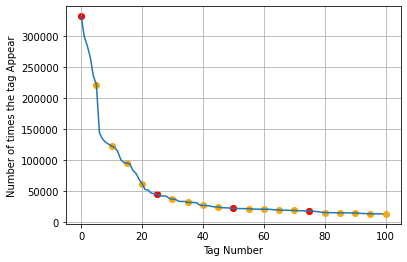

In [29]:
plt.plot(tag_counts[:100])
plt.scatter(x= list(range(0,105,5)), y = tag_counts[0:105:5], c= 'orange',label = "Quantiles with 5 % intervals")
plt.scatter(x= list(range(0,100,25)), y = tag_counts[0:100:25], c = "red", label = "Quantiles with 25th % intervals")
plt.grid()
plt.xlabel("Tag Number")
plt.ylabel("Number of times the tag Appear")
plt.show()

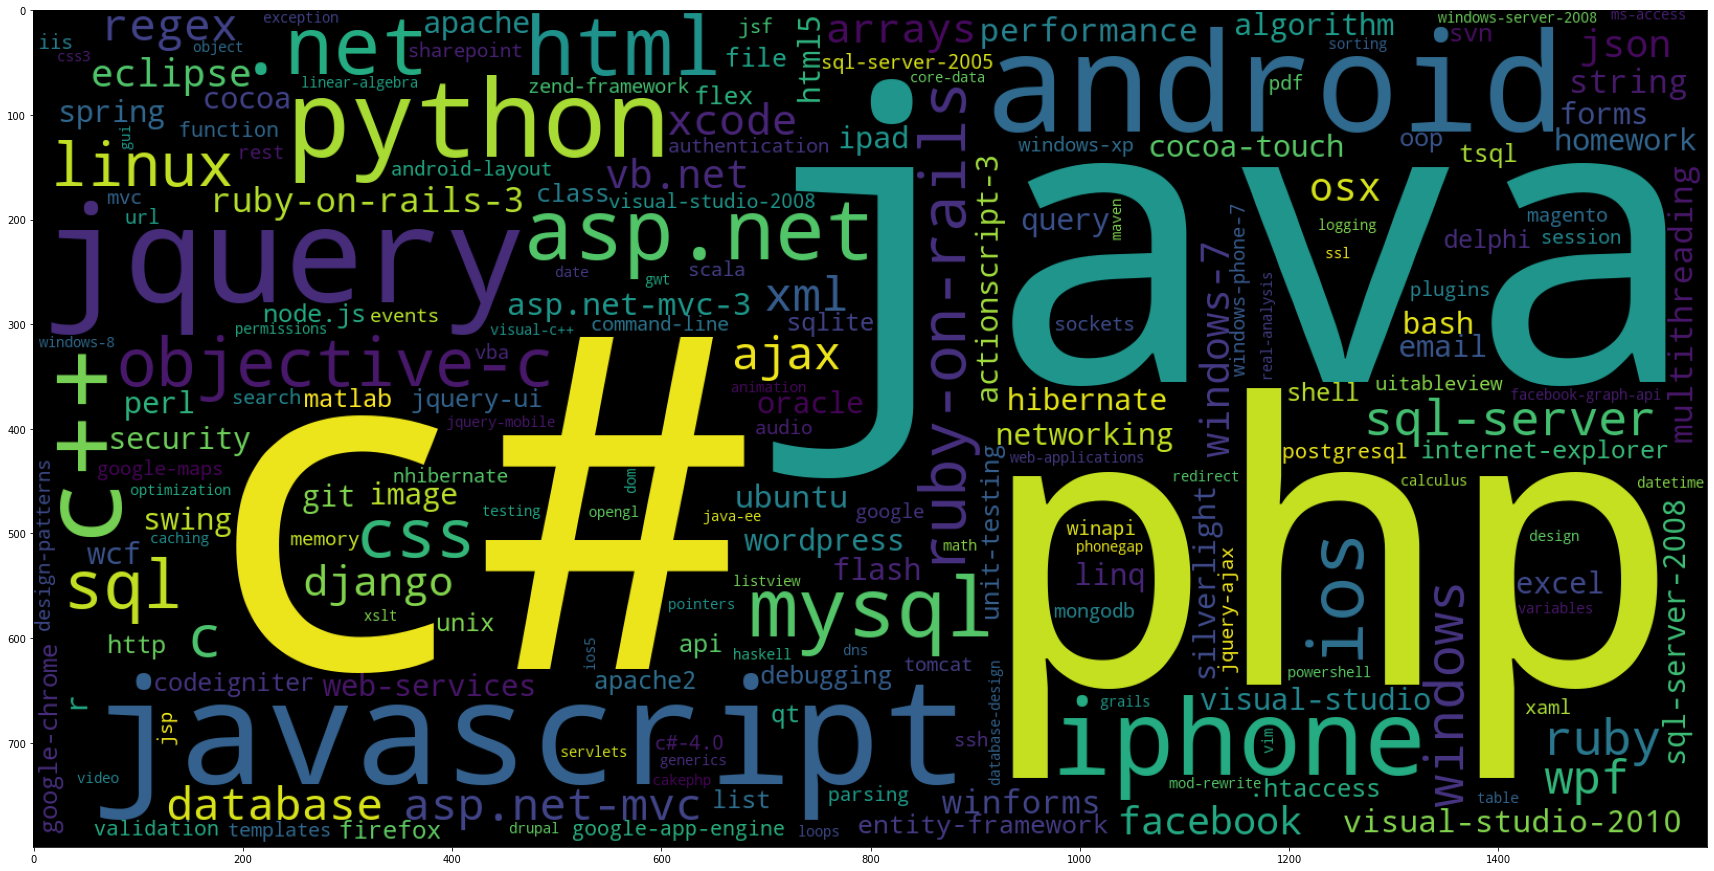

In [30]:
wordcloud = WordCloud(background_color='black',width = 1600, height = 800).generate_from_frequencies(result)
plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.show()

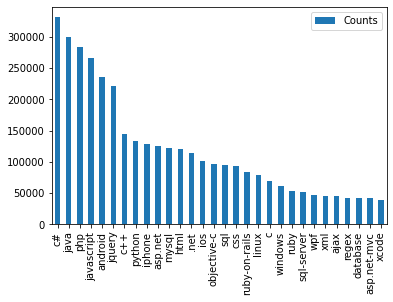

In [31]:
i = np.arange(30)
tag_df_sorted.head(30).plot(kind='bar')
plt.xticks(i, tag_df_sorted['Tags'][:30])
plt.show()

In [24]:
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

def striphtml(data):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr,' ',str(data))
    return cleantext

In [33]:
df.shape

(4206307, 5)

In [34]:
random_df = df.sample(50000)
random_df.head()

Id                                              Title  \
2048201  2048202                  Is Earth Crust Displacement real?   
1192388  1192389                       Select firefox search result   
2244185  2244186  Links starting with double slashes cause inval...   
5303546  5303547  MaintainScrollPositionOnPostback Does Not Work...   
5003707  5003708               Running a JFrame with a JProgressBar   

                                                      Body  \
2048201  <p>I've seen the topic of <a href="http://en.w...   
1192388  <p>I am working on a daily basis on a web appl...   
2244185  <p>All links on my website are protocol-less a...   
5303546  <blockquote>\n  <p><strong>Possible Duplicate:...   
5003707  <pre><code>public void myMethod {\n   MyProges...   

                                   Tags  tag_count  
2048201                         geology          1  
1192388        firefox search shortcuts          3  
2244185               .htaccess request          2  
5303546               .net-4.0 firefox4          2  
5003707  java swing jframe jprogressbar          4

In [35]:
random_df.shape

(50000, 5)

In [36]:
start = dt.datetime.now()
preprocessed_data_list=[]
questions_with_code=0
len_pre=0
len_post=0
questions_proccesed = 0
prepared_df = pd.DataFrame(columns=['question','code','tags','words_pre','words_post','is_code'])

for row in random_df.iterrows():

    is_code = 0

    #As title seems very important feature Hence increasing title weight by adding it 3 times
    title, question, tags = 3*(' ' +row[1][1]), row[1][2], row[1][3]

    if '<code>' in question:
        questions_with_code+=1
        is_code = 1
    x = len(question)+len(title)
    len_pre+=x

    code = str(re.findall(r'<code>(.*?)</code>', question, flags=re.DOTALL))

    question=re.sub('<code>(.*?)</code>', '', question, flags=re.MULTILINE|re.DOTALL)
    question=striphtml(question.encode('utf-8'))

    title=title.encode('utf-8')

    question=str(title)+" "+str(question)
    question=re.sub(r'[^A-Za-z]+',' ',question)
    words=word_tokenize(str(question.lower()))

    #Removing all single letter and and stopwords from question exceptt for the letter 'c'
    question=' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))

    len_post+=len(question)
    processed_di = {
        "question": question,
        "code": code,
        "tags": tags,
        "words_pre": x,
        "words_post": len(question),
        "is_code" : is_code
    }
    
    prepared_df.loc[len(prepared_df.index)] = [question,code,tags,x,len(question),is_code]
    questions_proccesed += 1
    if (questions_proccesed%10000==0):
        print("number of questions completed= ",questions_proccesed)

no_dup_avg_len_pre=(len_pre*1.0)/questions_proccesed
no_dup_avg_len_post=(len_post*1.0)/questions_proccesed

print( "Avg. length of questions(Title+Body) before processing: %d"%no_dup_avg_len_pre)
print( "Avg. length of questions(Title+Body) after processing: %d"%no_dup_avg_len_post)
print ("Percent of questions containing code: %d"%((questions_with_code*100.0)/questions_proccesed))

print("Time taken to run this cell :", dt.datetime.now() - start)

number of questions completed=  10000
number of questions completed=  20000
number of questions completed=  30000
number of questions completed=  40000
number of questions completed=  50000
Avg. length of questions(Title+Body) before processing: 1284
Avg. length of questions(Title+Body) after processing: 398
Percent of questions containing code: 58
Time taken to run this cell : 0:16:34.493212


In [37]:
prepared_df.head()

question  \
0  earth crust displac real earth crust displac r...   
1  select firefox search result select firefox se...   
2  link start doubl slash caus invalid request li...   
3  maintainscrollpositiononpostback work firefox ...   
4  run jframe jprogressbar run jframe jprogressba...   

                                                code  \
0                                                 []   
1                                                 []   
2                                                 []   
3  ['&lt;browsers&gt;\n  &lt;browser id="Firefox4...   
4  ['public void myMethod {\n   MyProgessBarFrame...   

                             tags words_pre words_post is_code  
0                         geology      1599        810       0  
1        firefox search shortcuts      1253        725       0  
2               .htaccess request       680        441       0  
3               .net-4.0 firefox4      1265        448       1  
4  java swing jframe jprogressbar       694        182       1

In [38]:
preprocessed_data = prepared_df[["question","tags"]]
preprocessed_data.head()

question  \
0  earth crust displac real earth crust displac r...   
1  select firefox search result select firefox se...   
2  link start doubl slash caus invalid request li...   
3  maintainscrollpositiononpostback work firefox ...   
4  run jframe jprogressbar run jframe jprogressba...   

                             tags  
0                         geology  
1        firefox search shortcuts  
2               .htaccess request  
3               .net-4.0 firefox4  
4  java swing jframe jprogressbar

In [39]:
preprocessed_data.shape

(50000, 2)

In [40]:
vectorizer = CountVectorizer(tokenizer= lambda text : text.split(), binary=True)
multilabel_y = vectorizer.fit_transform(preprocessed_data["tags"])

In [41]:
multilabel_y.get_shape()

(50000, 13904)

In [42]:
total_qs = preprocessed_data.shape[0]
print(total_qs)

total_tags = multilabel_y.shape[1]
print(total_tags)

50000
13904


In [43]:
def tags_to_choose(n):
    t = multilabel_y.sum(axis=0).tolist()[0]
    sorted_tags_i = sorted(range(len(t)), key=lambda i: t[i], reverse=True)
    multilabel_yn=multilabel_y[:,sorted_tags_i[:n]]
    return multilabel_yn

def questions_explained_fn(n):
    multilabel_yn = tags_to_choose(n)
    x= multilabel_yn.sum(axis=1)
    return (np.count_nonzero(x==0))

In [44]:
questions_explained = []

for i in range(500, total_tags, 100):
    questions_explained.append(np.round(((total_qs-questions_explained_fn(i))/total_qs)*100,3))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.


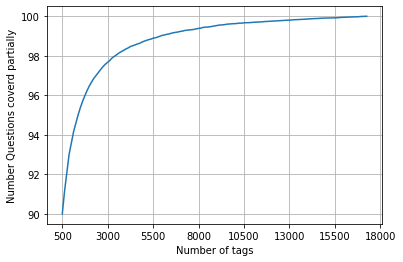

with  500 tags we are covering  90.0 % of questions
with  5000 tags we are covering  99.05199999999999 % of questions
with  12000 tags we are covering  99.90400000000001 % of questions


In [45]:
fig, ax = plt.subplots()
ax.plot(questions_explained)
xlabel = list(500+np.array(range(-50,450,50))*50)
ax.set_xticklabels(xlabel)
plt.xlabel("Number of tags")
plt.ylabel("Number Questions coverd partially")
plt.grid()
plt.show()
# you can choose any number of tags based on your computing power, minimun is 500(it covers 90% of the tags)
print("with ",500,"tags we are covering ",((total_qs-questions_explained_fn(500))/total_qs)*100,"% of questions")
print("with ",5000,"tags we are covering ",((total_qs-questions_explained_fn(5000))/total_qs)*100,"% of questions")
print("with ",12000,"tags we are covering ",((total_qs-questions_explained_fn(12000))/total_qs)*100,"% of questions")

In [46]:
print("number of questions that are not covered :", questions_explained_fn(5000),"out of ", total_qs)

number of questions that are not covered : 474 out of  50000


In [47]:
multilabel_yx = tags_to_choose(5000)
multilabel_yx.get_shape()

(50000, 5000)

In [48]:
print("Number of tags in sample :", multilabel_y.shape[1])
print("number of tags taken :", multilabel_yx.shape[1],"(",(multilabel_yx.shape[1]/multilabel_y.shape[1])*100,"%)")

Number of tags in sample : 13904
number of tags taken : 5000 ( 35.96087456846951 %)


In [49]:
x_train , x_test , y_train , y_test = train_test_split(preprocessed_data, multilabel_yx ,test_size = 0.2)

In [50]:
print("Number of data points in x_train data :", x_train.shape)
print("Number of data points in y_train data :", y_train.shape)
print("Number of data points in x_test data :", x_test.shape)
print("Number of data points in y_test data :", y_test.shape)

Number of data points in x_train data : (40000, 2)
Number of data points in y_train data : (40000, 5000)
Number of data points in x_test data : (10000, 2)
Number of data points in y_test data : (10000, 5000)


In [51]:
x_train.head()

question  \
16844  userprofil usernotfoundexceptio userprofil use...   
7441   css layout intern div css layout intern div cs...   
27169  map function numpi array vari paramet map func...   
49077  fastest int convert toint int pars fastest int...   
34103  import modul sqlite python virtual environ imp...   

                                    tags  
16844  user-profile user-profile-service  
7441                                 css  
27169   python arrays map numpy currying  
49077            c# optimization casting  
34103                python django pinax

In [52]:
tfidf_vect = TfidfVectorizer(min_df=0.00009,max_features=200000,smooth_idf=True,norm='l2',
                             tokenizer=lambda x : x.split(), sublinear_tf=False, ngram_range=(1,3) )

In [53]:
x_train_vectors = tfidf_vect.fit_transform(x_train['question'])
x_test_vectors = tfidf_vect.transform(x_test['question'])

In [54]:
print("Dimensions of train data X:",x_train_vectors.shape, ", Y :",y_train.shape)
print("Dimensions of test data X:",x_test_vectors.shape, ", Y:",y_test.shape)

Dimensions of train data X: (40000, 108158)  Y : (40000, 5000)
Dimensions of test data X: (10000, 108158)  Y: (10000, 5000)


In [56]:
#boom2()

In [58]:
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(x_train_vectors,y_train)

OneVsRestClassifier(estimator=SGDClassifier(alpha=1e-05, loss='log',
                                            penalty='l1'),
                    n_jobs=-1)

In [62]:
#boom2()

In [68]:
predictions = classifier.predict(x_test_vectors)

In [1]:
print("hamming loss ", metrics.hamming_loss(y_test,predictions))

print("micro f1 score ", metrics.f1_score(y_test, predictions, average='micro', zero_division='warn'))
print("macro f1 score ",metrics.f1_score(y_test,predictions, average='macro', zero_division='warn'))
print("weighted f1 score ", metrics.f1_score(y_test, predictions, average='weighted', zero_division='warn'))
print("samples f1 score ", metrics.f1_score(y_test, predictions, average='samples', zero_division='warn'))

hamming loss  0.00044848
micro f1 score  0.3974310743268662
macro f1 score  0.10043501556177806
weighted f1 score  0.34563944198682245
samples f1 score  0.35094742424242426


In [ ]:
boom2()